# Meta Model Analysis

## Imports

In [1]:
# for colab run
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/projeto/automl-dynamic-search-space/analysis/meta-model-design/")

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# COLORS = ["#333333", "#999ea2", "#6fa2d0", "#4d759a", "#073763"][::-1]
# COLORS = ["#1B262C", "#0F4C75", "#3282B8", "#BBE1FA"]
COLORS = ["#000057", "#4d759a", "#3282B8",  "#999ea2", "#4f4f4f", "#1B262C"]

MY_PALLETE = sns.color_palette("colorblind")
sns.set_palette(MY_PALLETE)

In [3]:
import  pickle

def read_pickle_dict(f):
  d = None
  with open(f, 'rb') as pickleFile:
      d = pickle.load(pickleFile)
  return d

def get_meta_learner_experiment(path='result_meta_learners.pickle'):
  return read_pickle_dict(path)

def get_meta_feature_experiment(path='result_meta_features.pickle'):
  return read_pickle_dict(path)

def get_meta_feature_selection_experiment(path='result_meta_learners_feature_selection.pickle'):
  return read_pickle_dict(path)

PATH = "images/"
if not os.path.exists(PATH):
    os.makedirs(PATH)

def save_pdf(name, g, extention=".pdf", path=PATH):
  plt.tight_layout()
  g.savefig(path+name+extention)

## Meta-Learner

In [25]:
def performance_boxplot(result, group_col, take=None, fix=True, rotate_x=False,
                        sort_by=None, group_col_rename = None,
                        rename_label=None):

  measures = {
    "test_r2": ("r2", False, (0, 1)),
    "test_rrmse": ("rrmse", True, (0, 1)),
    "test_mape": ("mape", True, None),
    "test_rmse": ("rmse", True, (0, 0.5)),
    "test_mse": ("mse", True, (0, 0.5)),
  }

  for metric, (metric_name, ascending, fix) in measures.items():
    df = pd.concat([pd.DataFrame(r).explode(list(r.keys())) for _, r in result.items()])\
      .reset_index()\
      .query(f"index == '{metric}'")\
      .drop(columns="index")\
      .melt(var_name=group_col, value_name=metric_name)
    if take:
      idx = df[group_col].isin(take)
      df = df[idx]

    if rename_label:
      df[group_col] = rename_label(df[group_col])

    if not sort_by:
      sort_values =  df.groupby([group_col])[metric_name].agg(["mean", "mean", "std"]).round(2)
      sort_by_ = df.groupby([group_col]).median().sort_values(by=metric_name, ascending=ascending).index.to_list()
      print(f"{metric_name}:")
      display(sort_values)


    g = sns.boxplot(data=df, x=group_col, y=metric_name, order=sort_by_)
    if fix:
      g.set_ylim(fix)
    if rotate_x:
      plt.xticks(rotation = rotate_x)
    if group_col_rename:
      g.set(xlabel=group_col_rename)

    if group_col_rename:
      save_pdf(group_col_rename+"_"+metric_name, g.figure)
    else:
        save_pdf(group_col+"_"+metric_name, g.figure)
    plt.show()

r2:


,mean,mean,std
meta-learner,,,
DT,0.533301,0.533301,1.000000e-01
MLP,-100000303753.404938,-100000303753.404938,9.972081e+11
RF,0.734451,0.734451,7.000000e-02
SVM,0.580936,0.580936,9.000000e-02
kNN,0.577094,0.577094,9.000000e-02


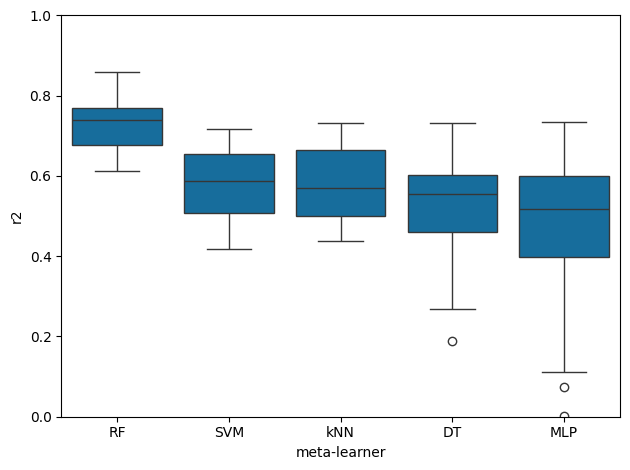

rrmse:


,mean,mean,std
meta-learner,,,
DT,0.679326,0.679326,0.07
MLP,34120.285642,34120.285642,315965.91
RF,0.51045,0.51045,0.07
SVM,0.644043,0.644043,0.07
kNN,0.646347,0.646347,0.07


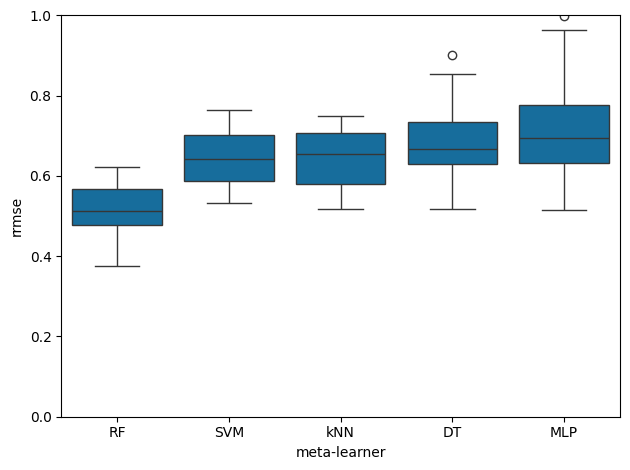

mape:


,mean,mean,std
meta-learner,,,
DT,52907553364070.921875,52907553364070.921875,2.772386e+13
MLP,852807191503774208.0,852807191503774208.0,8.137541e+18
RF,51748103291117.789062,51748103291117.789062,2.659266e+13
SVM,125163909785791.953125,125163909785791.953125,3.275025e+13
kNN,95206075244722.59375,95206075244722.59375,3.286366e+13


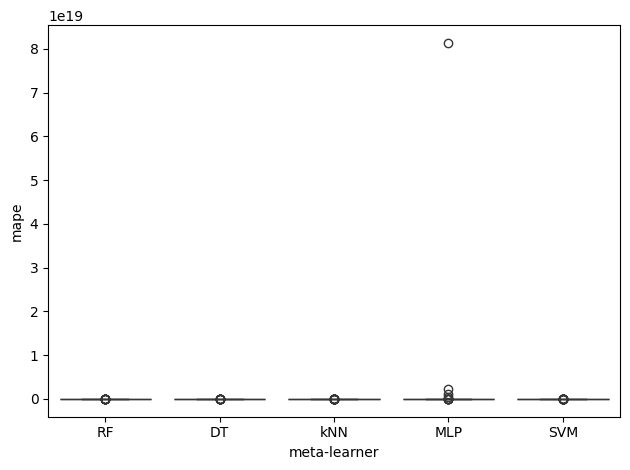

rmse:


,mean,mean,std
meta-learner,,,
DT,0.203665,0.203665,0.02
MLP,9338.541259,9338.541259,86477.96
RF,0.153318,0.153318,0.02
SVM,0.192998,0.192998,0.02
kNN,0.193442,0.193442,0.02


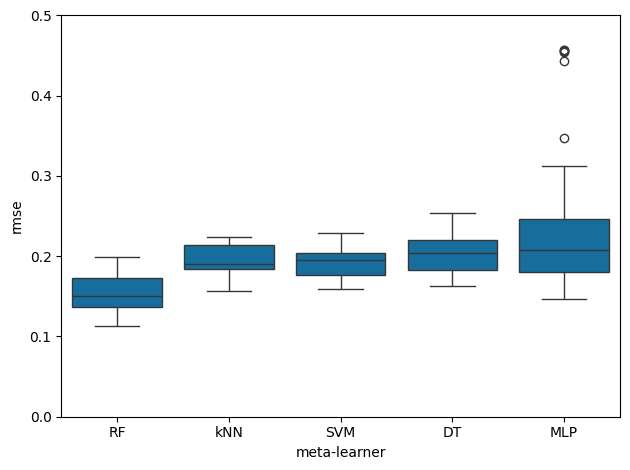

mse:


,mean,mean,std
meta-learner,,,
DT,0.04201,0.04201,1.000000e-02
MLP,7490862046.816616,7490862046.816616,7.469926e+10
RF,0.0241,0.0241,1.000000e-02
SVM,0.037651,0.037651,1.000000e-02
kNN,0.037817,0.037817,1.000000e-02


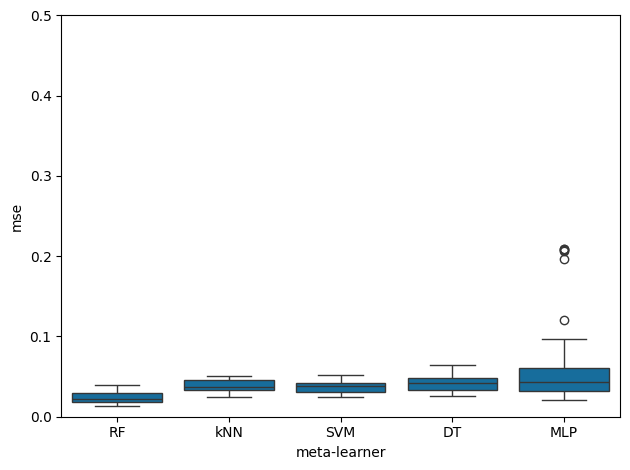

In [26]:
performance_boxplot(
    result = get_meta_learner_experiment(),
    group_col = 'meta-learner',
    take = ["kNN", "SVM", "MLP", "RF", "DT"]
)

## Meta-Features

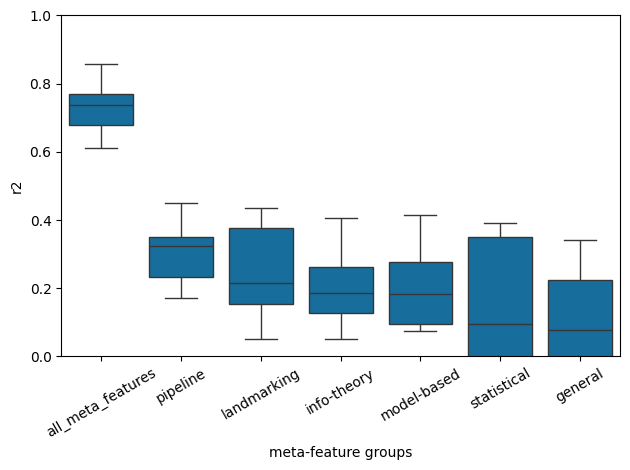

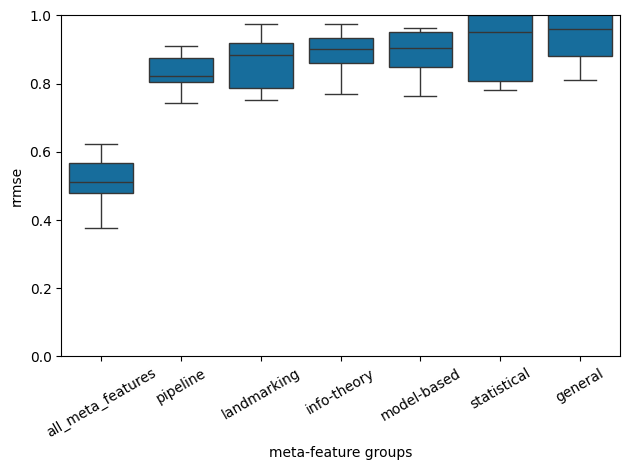

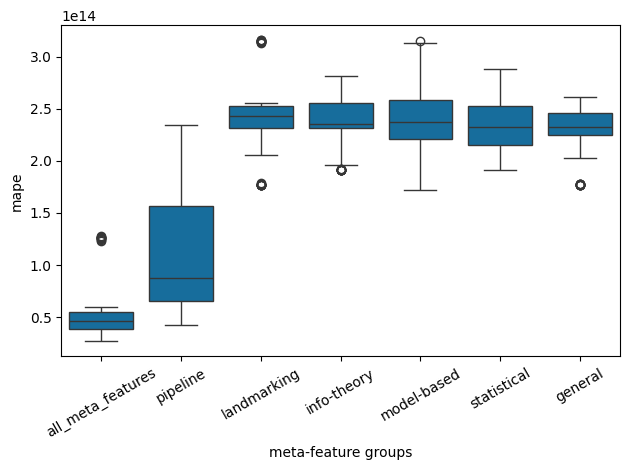

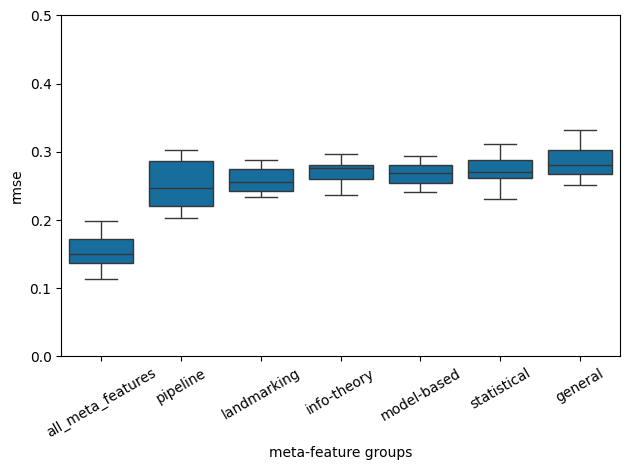

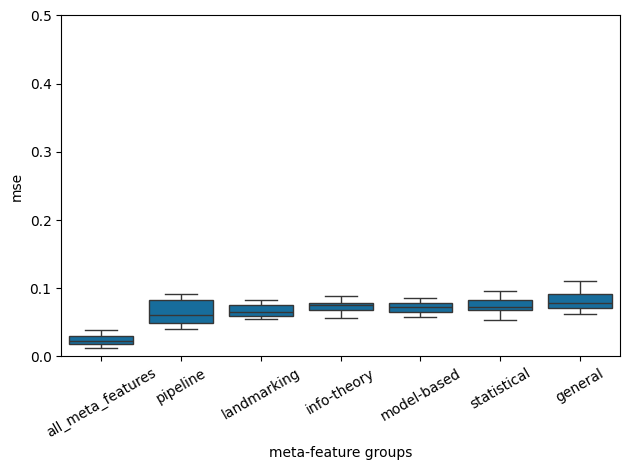

In [ ]:
performance_boxplot(
    result = get_meta_feature_experiment(),
    group_col = 'groups',
    fix = False,
    rotate_x = 30,
    group_col_rename = "meta-feature groups",
)

## Meta Feature Selection

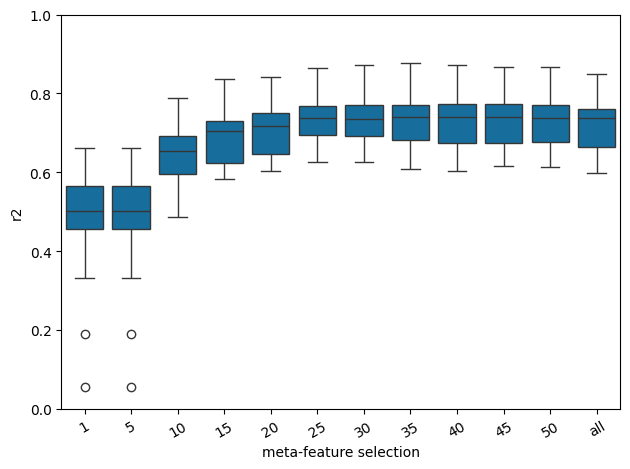

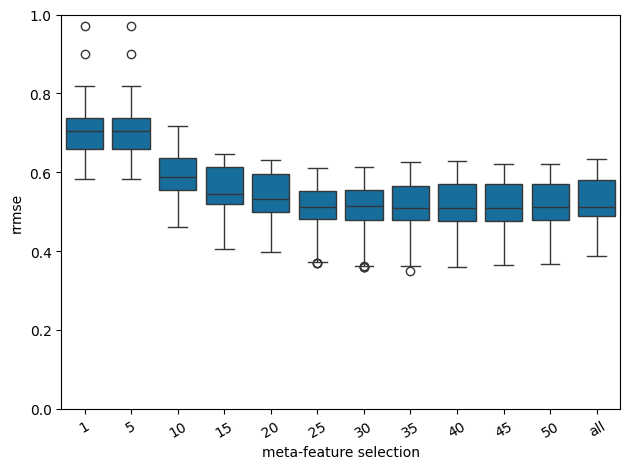

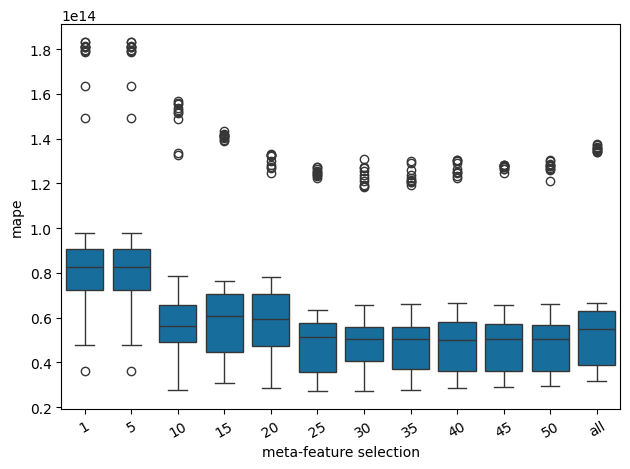

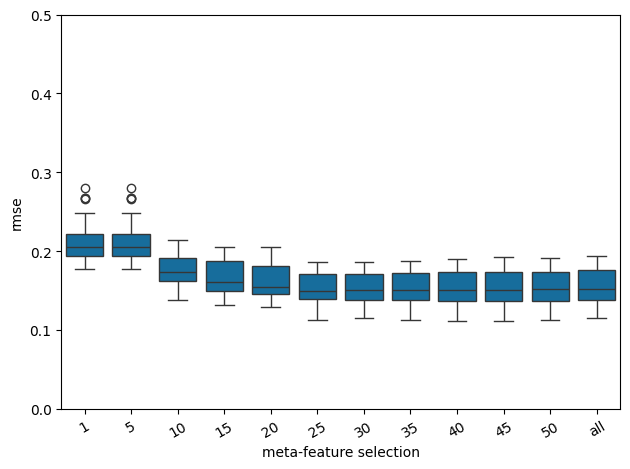

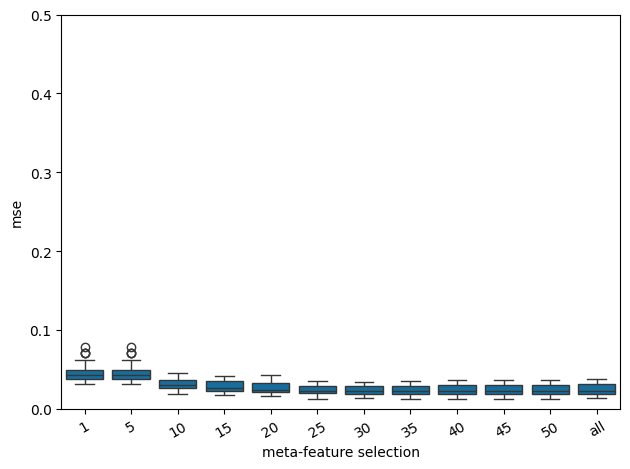

In [ ]:
performance_boxplot(
    result = get_meta_feature_selection_experiment(),
    group_col = 'groups',
    fix = True,
    rotate_x = 30,
    sort_by = ["1", "5", "10", "15", "20", "25", "30", "35", "40", "45", "50", "all"],
    group_col_rename = "meta-feature selection",
    rename_label = lambda x: [i.split("-")[0] for i in x]
)